# **Zeitreihen Analyse**

*Fabian Niebelschütz*

---

# Univariate Zeitreihenanalyse

# Übersicht: Tests und Methoden der Zeitreihenanalyse

## 1. Bestimmung der Integrationsordnung
### Augmented Dickey-Fuller Test (ADF-Test)
- Testet die Nullhypothese, dass eine Einheitswurzel vorliegt (Zeitreihe ist nicht-stationär)
- Alternative Hypothese: Zeitreihe ist stationär
- Interpretation: p-Wert < 0.05 bedeutet Ablehnung der Nullhypothese → Zeitreihe ist stationär

### Phillips-Perron Test (PP-Test)
- Ähnlich wie ADF-Test, aber robuster gegenüber Heteroskedastizität
- Testet ebenfalls auf Einheitswurzel
- Interpretation: wie beim ADF-Test

### Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS-Test)
- Umgekehrter Ansatz im Vergleich zu ADF und PP
- Nullhypothese: Zeitreihe ist stationär
- Alternative Hypothese: Zeitreihe hat eine Einheitswurzel
- Interpretation: p-Wert < 0.05 bedeutet Ablehnung der Nullhypothese → Zeitreihe ist nicht-stationär

In [3]:
########################################################
#-----------------------   1.   -----------------------#
#--------- Bestimmung der Integrationsordnung ---------#
########################################################


#-#-#-#-#-#-#-#-#-#-#-# Librarys #-#-#-#-#-#-#-#-#-#-#-#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

#-#-#-#-#-#-#-#-#-# Daten einlesen #-#-#-#-#-#-#-#-#-#-#
data_MBG_DE = pd.read_csv('/Users/fabi/Documents/BBA/6_Semester/Vertiefung_BBA/Zeitreihenanalyse_Menden/THWS_Reihenanalysen/data/mbg.de_aktien_daten.csv', 
                   skiprows=3, 
                   header=None, 
                   names=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], 
                   parse_dates=[0], 
                   index_col=0)  

# Konvertiere alle numerischen Spalten zu Float
for col in data_MBG_DE.columns:
    data_MBG_DE[col] = pd.to_numeric(data_MBG_DE[col], errors='coerce')

# !!! WICHTIG !!!
# Die Zeitreihe Verwendet die Close Spalte
Zeitreihe_MBG_DE = data_MBG_DE["Close"]


#------------------------------------------------------#
#-#-#-#-#-#-#-# Augmented Dickey-Fuller  #-#-#-#-#-#-#-#
#------------------------------------------------------#
def adf_test(timeseries):
    print('Augmented Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    
    # Ausgabe der Testergebnisse
    output = pd.Series(
        [result[0], result[1], result[2], result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']],
        index=['Test-Statistik', 'p-Wert', 'Lags verwendet', 'Anzahl der Beobachtungen', 'Kritischer Wert (1%)', 
               'Kritischer Wert (5%)', 'Kritischer Wert (10%)']
    )
    
    print(output)
    
    # Interpretation
    if result[1] <= 0.05:
        print("Schlussfolgerung: Die Nullhypothese wird abgelehnt. Die Zeitreihe ist stationär.")
    else:
        print("Schlussfolgerung: Die Nullhypothese kann nicht abgelehnt werden. Die Zeitreihe ist nicht-stationär.")
    
    return result


#------------------------------------------------------#
#-#-#-#-#-#-#-#-#-#-#-#-# KPSS #-#-#-#-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#
def kpss_test(timeseries):
    print('KPSS-Test:')
    
    # KPSS-Test durchführen
    try:
        result = kpss(timeseries, regression='c')
        
        # Ausgabe der Testergebnisse
        output = pd.Series(
            [result[0], result[1], result[2], result[3]['10%'], result[3]['5%'], result[3]['2.5%'], result[3]['1%']],
            index=['Test-Statistik', 'p-Wert', 'Lags verwendet', 'Kritischer Wert (10%)', 
                   'Kritischer Wert (5%)', 'Kritischer Wert (2.5%)', 'Kritischer Wert (1%)']
        )
        
        print(output)
        
        # Interpretation
        if result[1] <= 0.05:
            print("Schlussfolgerung: Die Nullhypothese wird abgelehnt. Die Zeitreihe ist nicht-stationär.")
        else:
            print("Schlussfolgerung: Die Nullhypothese kann nicht abgelehnt werden. Die Zeitreihe ist stationär.")
            
    except Exception as e:
        print(f"Fehler beim KPSS-Test: {e}")
    
    return result


#------------------------------------------------------#
#-#-#-#-#-#-#-#-#-# Phillips-Perron  #-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#
def pp_test(timeseries):
    print('Phillips-Perron Test:')
    
    # Phillips-Perron Test durchführen
    try:
        # Wir nutzen die PP-Test Implementierung von statsmodels
        result = sm.tsa.stattools.phillips_perron(timeseries)
        
        # Ausgabe der Testergebnisse
        output = pd.Series(
            [result[0], result[1]],
            index=['Test-Statistik', 'p-Wert']
        )
        
        print(output)
        
        # Interpretation
        if result[1] <= 0.05:
            print("Schlussfolgerung: Die Nullhypothese wird abgelehnt. Die Zeitreihe ist stationär.")
        else:
            print("Schlussfolgerung: Die Nullhypothese kann nicht abgelehnt werden. Die Zeitreihe ist nicht-stationär.")
            
    except Exception as e:
        print(f"Fehler beim Phillips-Perron Test: {e}")
    
    return result


#------------------------------------------------------#
#-#-#-#-#-#-#-#-#-# Test  Durchführung #-#-#-#-#-#-#-#-#
#------------------------------------------------------#
print("=== Tests für die Originalzeitreihe ===")
adf_result = adf_test(Zeitreihe_MBG_DE.dropna())
kpss_result = kpss_test(Zeitreihe_MBG_DE.dropna())
try:
    pp_result = pp_test(Zeitreihe_MBG_DE.dropna())
except:
    print("Phillips-Perron Test konnte nicht durchgeführt werden.")

=== Tests für die Originalzeitreihe ===
Augmented Dickey-Fuller Test:
Test-Statistik                -0.983964
p-Wert                         0.759068
Lags verwendet                20.000000
Anzahl der Beobachtungen    7289.000000
Kritischer Wert (1%)          -3.431247
Kritischer Wert (5%)          -2.861937
Kritischer Wert (10%)         -2.566981
dtype: float64
Schlussfolgerung: Die Nullhypothese kann nicht abgelehnt werden. Die Zeitreihe ist nicht-stationär.
KPSS-Test:
Test-Statistik             9.660206
p-Wert                     0.010000
Lags verwendet            53.000000
Kritischer Wert (10%)      0.347000
Kritischer Wert (5%)       0.463000
Kritischer Wert (2.5%)     0.574000
Kritischer Wert (1%)       0.739000
dtype: float64
Schlussfolgerung: Die Nullhypothese wird abgelehnt. Die Zeitreihe ist nicht-stationär.
Phillips-Perron Test:
Fehler beim Phillips-Perron Test: module 'statsmodels.tsa.stattools' has no attribute 'phillips_perron'
Phillips-Perron Test konnte nicht durchgefüh

/var/folders/mb/l0xd46hd0253gyf6hjncbj740000gn/T/ipykernel_94352/573382786.py:66: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(timeseries, regression='c')


---

## 2. Transformation zur Stationarität
### Differenzierung
- Erste Differenz: $y_t - y_{t-1}$
- Zweite Differenz: $(y_t - y_{t-1}) - (y_{t-1} - y_{t-2})$
- Bestimmt den d-Wert im ARIMA(p,d,q)-Modell

### Logarithmische Transformation
- Anwendung bei ungleicher Varianz
- Stabilisiert die Varianz
- Logarithmische Wachstumsrate: $g_t := \ln(x_t) - \ln(x_{t-1})$

### Logarithmisch differenziert

### Moving Average
- Gleitender Durchschnitt zur Glättung der Zeitreihe
- Formel: $\bar{y}_t = \frac{y_t + y_{t-1} + ... + y_{t-T+1}}{T}$

### Simple Exponential Smoothing
- Gewichteter gleitender Durchschnitt
- Neuere Beobachtungen erhalten höhere Gewichtung
- Formel: $\hat{y}_{t+1} = \alpha \times y_t + (1-\alpha) \times \hat{y}_t$ mit $0 \leq \alpha \leq 1$

### HP-Filter (Hodrick-Prescott-Filter)
- Zerlegt Zeitreihe in Trend- und Zykluskomponente
- Minimierungsproblem: 
  $\min_{\{y_t^T\}} \sum_{t=1}^T (y_t - y_t^T)^2 + \lambda \sum_{t=2}^{T-1} [(y_{t+1}^T - y_t^T) - (y_t^T - y_{t-1}^T)]^2$
- λ-Parameter: 1.600 für Quartalsdaten, 6,25 für Jahresdaten, 134.916 für Monatsdaten

In [5]:
########################################################
#-----------------------   2.   -----------------------#
#---------- Transformation zur Stationarität ----------#
########################################################

import numpy as np
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

def stationaritaets_transformationen(zeitreihe, name):
    """
    Führt verschiedene Transformationen zur Stationarität auf einer Zeitreihe durch.
    
    Parameter:
    -----------
    zeitreihe : pandas.Series
        Die zu transformierende Zeitreihe
    name : str
        Name der Zeitreihe für die Benennung der Ausgabevariablen
    
    Rückgabe:
    --------
    dict
        Dictionary mit allen transformierten Zeitreihen
    """
    transformiert = {}
    
    # Originale Zeitreihe speichern
    transformiert[f"{name}_original"] = zeitreihe
    
    # 1. Differenzierung
    # Erste Differenz
    transformiert[f"{name}_diff1"] = zeitreihe.diff().dropna()
    
    # Zweite Differenz
    transformiert[f"{name}_diff2"] = transformiert[f"{name}_diff1"].diff().dropna()
    
    # 2. Logarithmische Transformation
    # Prüfen, ob alle Werte > 0 sind für Log-Transformation
    if all(zeitreihe > 0):
        # Log-Transformation
        transformiert[f"{name}_log"] = np.log(zeitreihe)
        
        # 3. Log-Differenz (Wachstumsrate)
        transformiert[f"{name}_log_diff"] = transformiert[f"{name}_log"].diff().dropna()
    else:
        print(f"Log-Transformation für {name} nicht möglich, da negative oder Null-Werte vorhanden sind.")
    
    # 4. Moving Average
    # Wähle eine geeignete Fensterlänge für MA
    window = 20
    transformiert[f"{name}_ma"] = zeitreihe.rolling(window=window).mean().dropna()
    
    # Differenz zum MA
    ma_temp = zeitreihe.rolling(window=window).mean()
    transformiert[f"{name}_ma_diff"] = (zeitreihe - ma_temp).dropna()
    
    # 5. Simple Exponential Smoothing
    # Optimal Alpha durch Optimierung finden
    try:
        optimal_model = SimpleExpSmoothing(zeitreihe).fit(optimized=True)
        ses_optimal = optimal_model.fittedvalues
        transformiert[f"{name}_ses"] = ses_optimal
        transformiert[f"{name}_ses_diff"] = zeitreihe - ses_optimal
    except:
        print(f"SES für {name} konnte nicht berechnet werden.")
    
    # 6. HP-Filter
    # Für tägliche Daten (Aktienkurse)
    lambda_param = 129600
    
    try:
        cycle, trend = hpfilter(zeitreihe, lamb=lambda_param)
        transformiert[f"{name}_hp_trend"] = trend
        transformiert[f"{name}_hp_cycle"] = cycle
    except Exception as e:
        print(f"HP-Filter für {name} konnte nicht angewendet werden: {e}")
    
    return transformiert

# Anwendung auf die einzelne Zeitreihe
transformationen_mbg = stationaritaets_transformationen(Zeitreihe_MBG_DE, "MBG_DE")

# Zugriff auf die Transformationen
mbg_original = transformationen_mbg["MBG_DE_original"]
mbg_diff1 = transformationen_mbg["MBG_DE_diff1"]
mbg_diff2 = transformationen_mbg["MBG_DE_diff2"]
mbg_log_diff = transformationen_mbg["MBG_DE_log_diff"]
mbg_ma = transformationen_mbg["MBG_DE_ma"]
mbg_ses = transformationen_mbg["MBG_DE_ses"]
mbg_hp_trend = transformationen_mbg["MBG_DE_hp_trend"]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


---

## 3. ACF und PACF Analyse
### Autokorrelationsfunktion (ACF)
- Misst Korrelation zwischen $y_t$ und $y_{t-k}$ für verschiedene Lags k
- Kovarianzfunktion: $\gamma_y(h) = Cov(y_{t+h}, y_t) = E[(y_{t+h} - \mu_y)(y_t - \mu_y)]$
- ACF: $\rho(h) = \frac{\gamma_y(h)}{\gamma_y(0)}$
- Hilft bei Identifikation des MA-Teils (q)
- Interpretation: 
  - MA(q): ACF bricht nach Lag q ab
  - AR(p): ACF klingt langsam ab

### Partielle Autokorrelationsfunktion (PACF)
- Misst Korrelation zwischen $y_t$ und $y_{t-k}$ unter Berücksichtigung der Zwischenlags
- Hilft bei Identifikation des AR-Teils (p)
- Interpretation:
  - AR(p): PACF bricht nach Lag p ab
  - MA(q): PACF klingt langsam ab

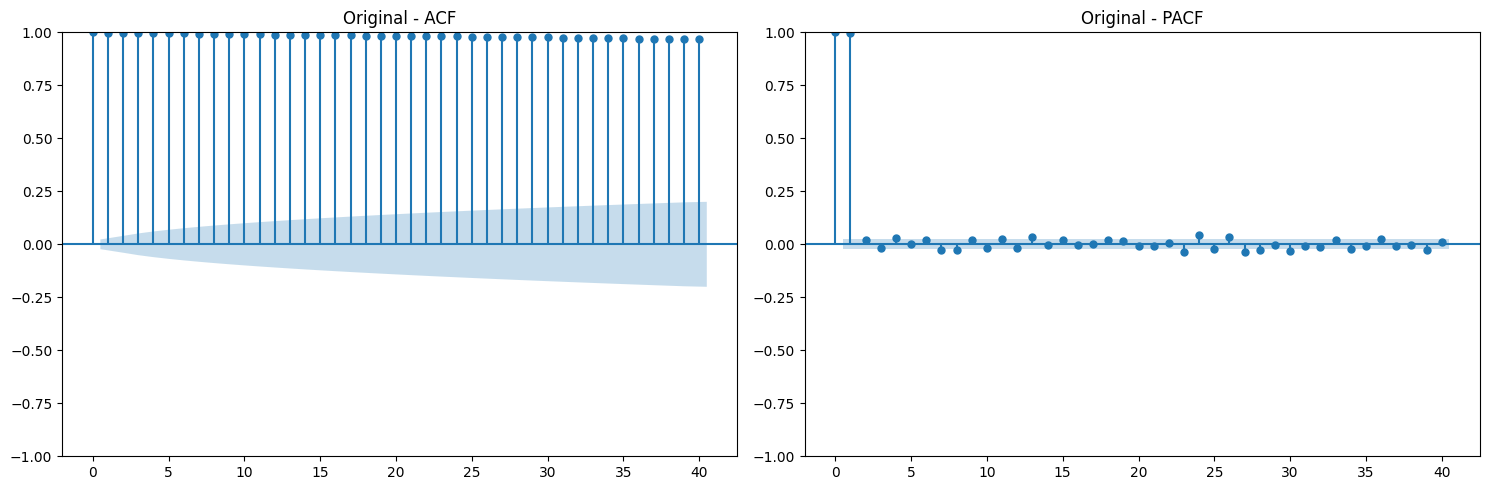

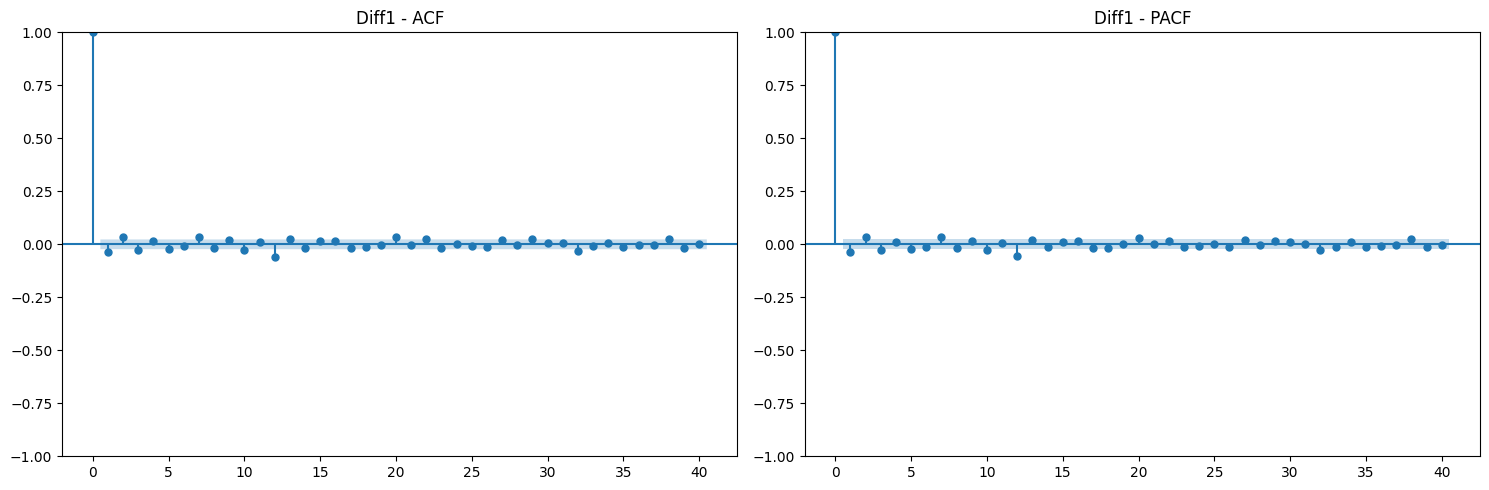

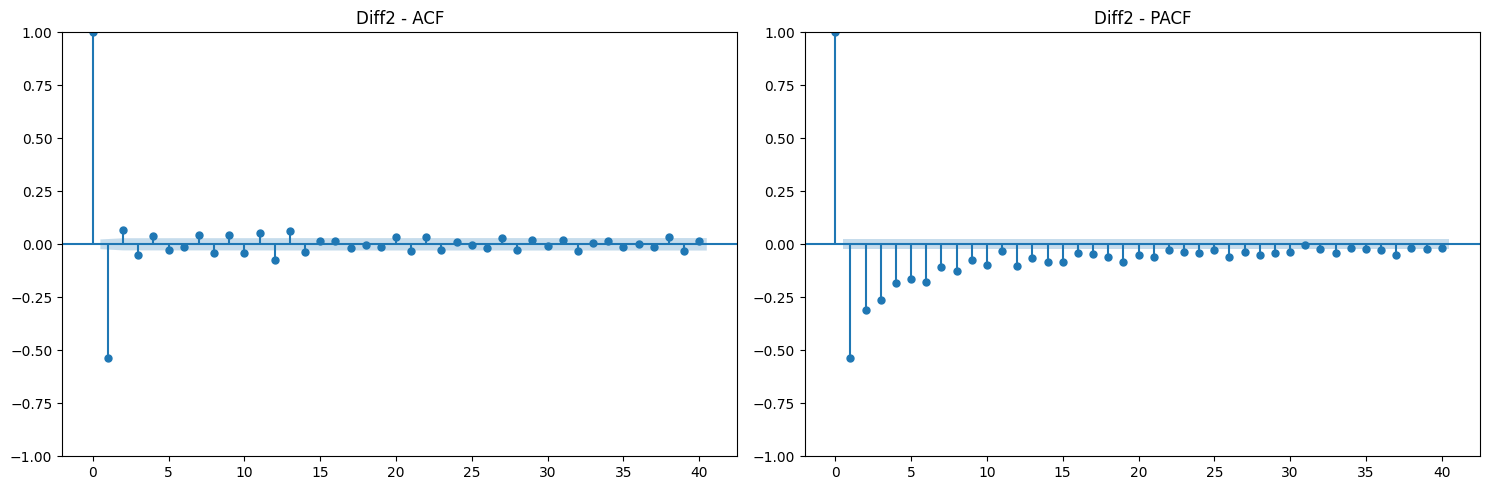

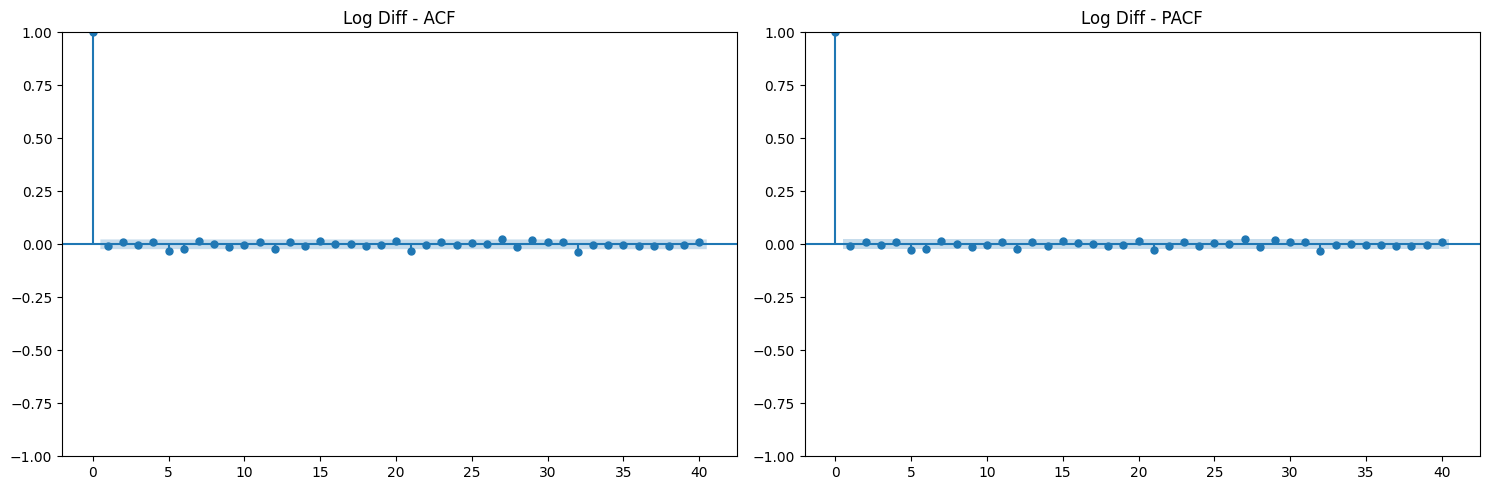

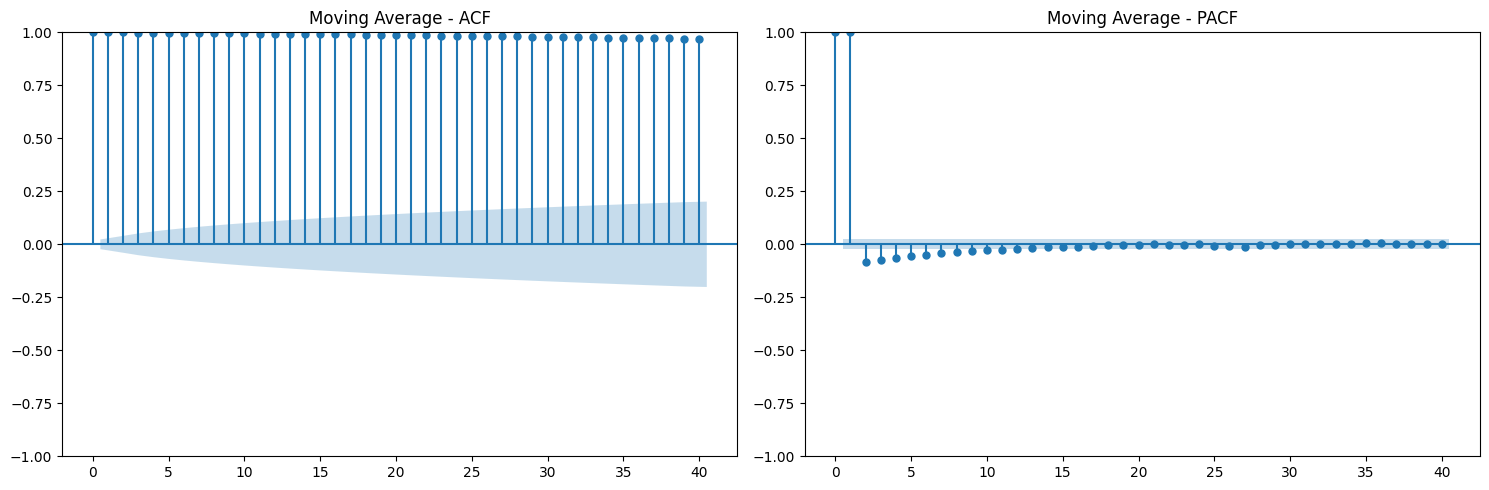

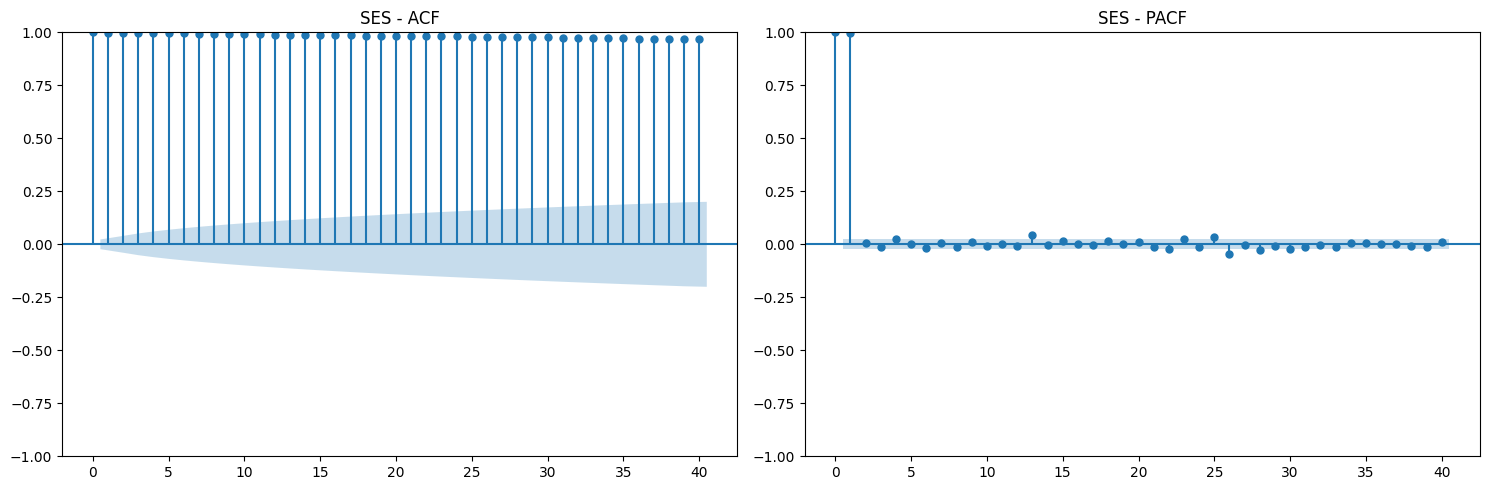

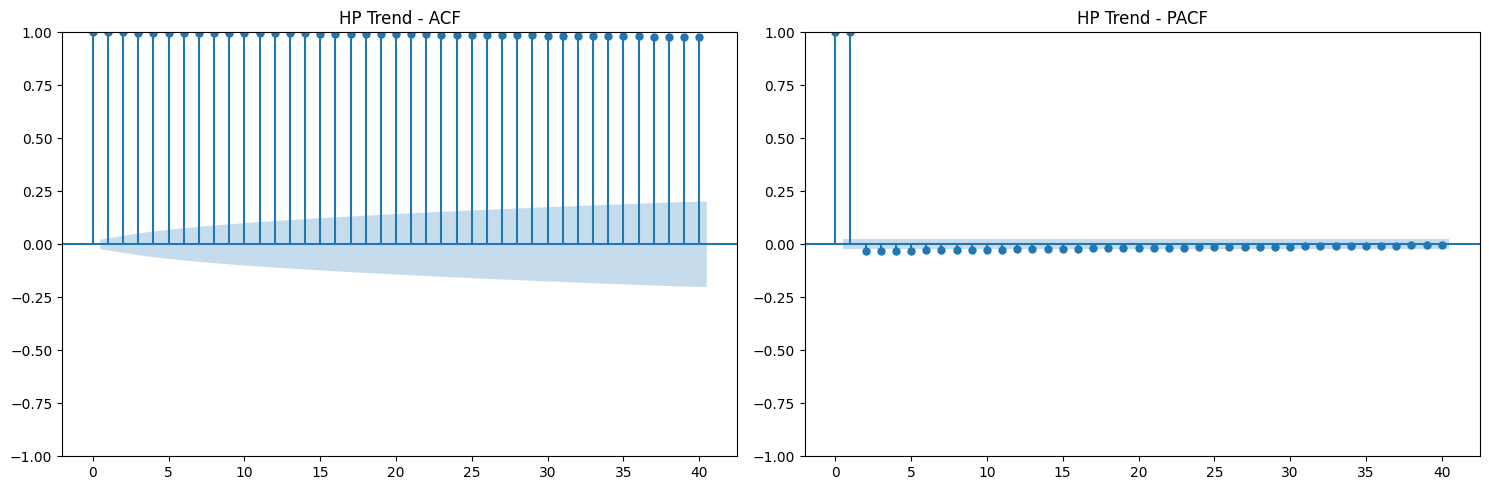

In [6]:
########################################################
#-----------------------   3.   -----------------------#
#---------------- ACF und PACF Analyse ----------------#
########################################################



#-#-#-#-#-#-#-#-#-#-#-# Librarys #-#-#-#-#-#-#-#-#-#-#-#

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Liste der Transformationen
transformationen_liste = [
    ("Original", mbg_original),
    ("Diff1", mbg_diff1),
    ("Diff2", mbg_diff2),
    ("Log Diff", mbg_log_diff),
    ("Moving Average", mbg_ma),
    ("SES", mbg_ses),
    ("HP Trend", mbg_hp_trend)
]

# ACF und PACF Plots für jede Transformation
for name, zeitreihe in transformationen_liste:
    # ACF und PACF in einem Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # ACF Plot
    plot_acf(zeitreihe, lags=40, ax=ax1)
    ax1.set_title(f"{name} - ACF")
    
    # PACF Plot
    plot_pacf(zeitreihe, lags=40, ax=ax2)
    ax2.set_title(f"{name} - PACF")
    
    plt.tight_layout()
    plt.show()

---

## 4. Modellspezifikation
### AR-Modelle (Autoregressive)
- AR(p): $y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \phi_p y_{t-p} + \varepsilon_t$
- Stationaritätsbedingung für AR(1): $|\phi| < 1$
- Stationaritätsbedingung für AR(2): Charakteristische Wurzeln des Lag-Polynoms $1 - \alpha_1 L - \alpha_2 L^2$ außerhalb des Einheitskreises
- Erwartungswert für AR(1): $E[Y_t] = 0$ bzw. $\frac{c}{1-\phi}$ (falls c vorhanden)
- Varianz für AR(1): $\gamma(0) = \frac{\sigma_{\varepsilon}^2}{1-\phi^2}$
- j-te Kovarianz für AR(1): $\gamma_y(j) = \phi^j\gamma_y(0) = \phi^j\frac{\sigma_{\varepsilon}^2}{1-\phi^2}$

### MA-Modelle (Moving Average)
- MA(q): $y_t = c + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + ... + \theta_q \varepsilon_{t-q}$
- Erwartungswert: $E[y_t] = c$
- Varianz: $\gamma_y(0) = (1 + \theta_1^2 + \theta_2^2 + ... + \theta_q^2)\sigma_{\varepsilon}^2$
- Autokovarianzen: 
  $\gamma_y(j) = \begin{cases} 
  (\theta_j + \theta_{j-1}\theta_1 + \theta_{j-2}\theta_2 + ... + \theta_0\theta_j)\sigma_{\varepsilon}^2 & \text{für } j = 1,2,...,q \\ 
  0 & \text{für } j > q 
  \end{cases}$

### ARMA-Modelle
- ARMA(p,q): $y_t = c + \phi_1 y_{t-1} + ... + \phi_p y_{t-p} + \varepsilon_t + \theta_1 \varepsilon_{t-1} + ... + \theta_q \varepsilon_{t-q}$
- Interpretation: sowohl ACF als auch PACF klingen langsam ab

### ARIMA-Modelle
- ARIMA(p,d,q): Integrierter ARMA-Prozess
- p: Ordnung des AR-Teils
- d: Differenzierungsgrad
- q: Ordnung des MA-Teils
- Definition I(d) Prozess: $\{y_t\}$ ist I(d), wenn seine d-te Differenz ein strikt stationärer Prozess, I(0), ist

Erstelle Auto-ARIMA Modell für MBG Log-Diff...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-35274.773, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-35281.260, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-35279.823, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-35279.810, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-35279.271, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-35279.995, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.362 seconds

Modell-Zusammenfassung:
Bestes ARIMA Modell: (0, 0, 0)
AIC: -35281.26
BIC: -35274.36

Detaillierte Modell-Zusammenfassung:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7309
Model:                        SARIMAX   Log Likelihood               17641.630
Date:                Mon, 19 May 2025   AIC                     

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


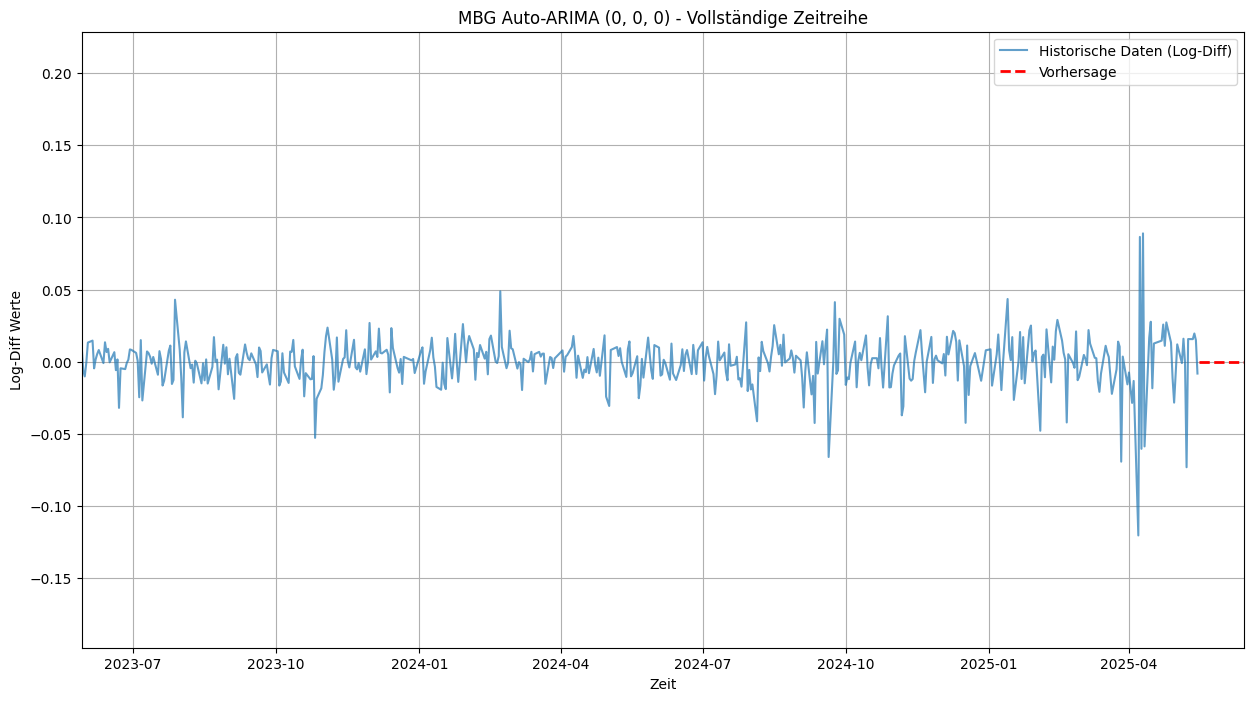

Anzahl der Datenpunkte in mbg_log_diff: 7309
Erster Datenpunkt: 1996-11-04 00:00:00
Letzter Datenpunkt: 2025-05-15 00:00:00
ARIMA Modell: (0, 0, 0)


In [8]:
########################################################
#-----------------------   4.   -----------------------#
#----------------- Modellspezifikation ----------------#
########################################################

#------------------------------------------------------#
#-#-#-#-#-#-#-#-#-#-#-# Librarys #-#-#-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#
from pmdarima.arima import auto_arima


#------------------------------------------------------#
#-#-#-#-#-#-#-#-#-#-# AUTO ARIMA #-#-#-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#

# Auto-ARIMA Modell für mbg_log_diff erstellen
print("Erstelle Auto-ARIMA Modell für MBG Log-Diff...")

# Auto-ARIMA ausführen
mbg_arima_model = auto_arima(
    mbg_log_diff,
    d=0,                    # d=0 da bereits differenziert
    max_p=15,              # max p=15
    max_q=15,              # max q=15
    seasonal=False,         # Keine Saisonalität
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore',
    trace=True             # Zeigt den Suchprozess an
)

# Modell-Zusammenfassung
print("\nModell-Zusammenfassung:")
print(f"Bestes ARIMA Modell: {mbg_arima_model.order}")
print(f"AIC: {mbg_arima_model.aic():.2f}")
print(f"BIC: {mbg_arima_model.bic():.2f}")

# Modell-Details anzeigen
print("\nDetaillierte Modell-Zusammenfassung:")
print(mbg_arima_model.summary())

# Vorhersage für die nächsten 30 Perioden
forecast_periods = 30
forecast = mbg_arima_model.predict(n_periods=forecast_periods)

print(f"\nVorhersage für die nächsten {forecast_periods} Perioden:")
print(forecast)

# Optional: Plot der Vorhersage
import matplotlib.pyplot as plt

# Verbesserte Visualisierung
plt.figure(figsize=(15, 8))

# Zeige alle historischen Daten (nicht nur letzte 100)
plt.plot(mbg_log_diff, label='Historische Daten (Log-Diff)', alpha=0.7)

# Erstelle einen kontinuierlichen Index für die Vorhersage
forecast_index = pd.date_range(
    start=mbg_log_diff.index[-1], 
    periods=forecast_periods + 1, 
    freq='D'
)[1:]  # Überspringe den ersten Wert (letzter historischer Punkt)

plt.plot(forecast_index, forecast, 
         label='Vorhersage', linestyle='--', color='red', linewidth=2)

plt.title(f'MBG Auto-ARIMA {mbg_arima_model.order} - Vollständige Zeitreihe')
plt.xlabel('Zeit')
plt.ylabel('Log-Diff Werte')
plt.legend()
plt.grid(True)

# Zoom auf die letzten Jahre
plt.xlim(mbg_log_diff.index[-500], forecast_index[-1] if len(forecast_index) > 0 else mbg_log_diff.index[-1])

plt.show()

# Zusätzliche Diagnose
print(f"Anzahl der Datenpunkte in mbg_log_diff: {len(mbg_log_diff)}")
print(f"Erster Datenpunkt: {mbg_log_diff.index[0]}")
print(f"Letzter Datenpunkt: {mbg_log_diff.index[-1]}")
print(f"ARIMA Modell: {mbg_arima_model.order}")

---

## Umwandeln

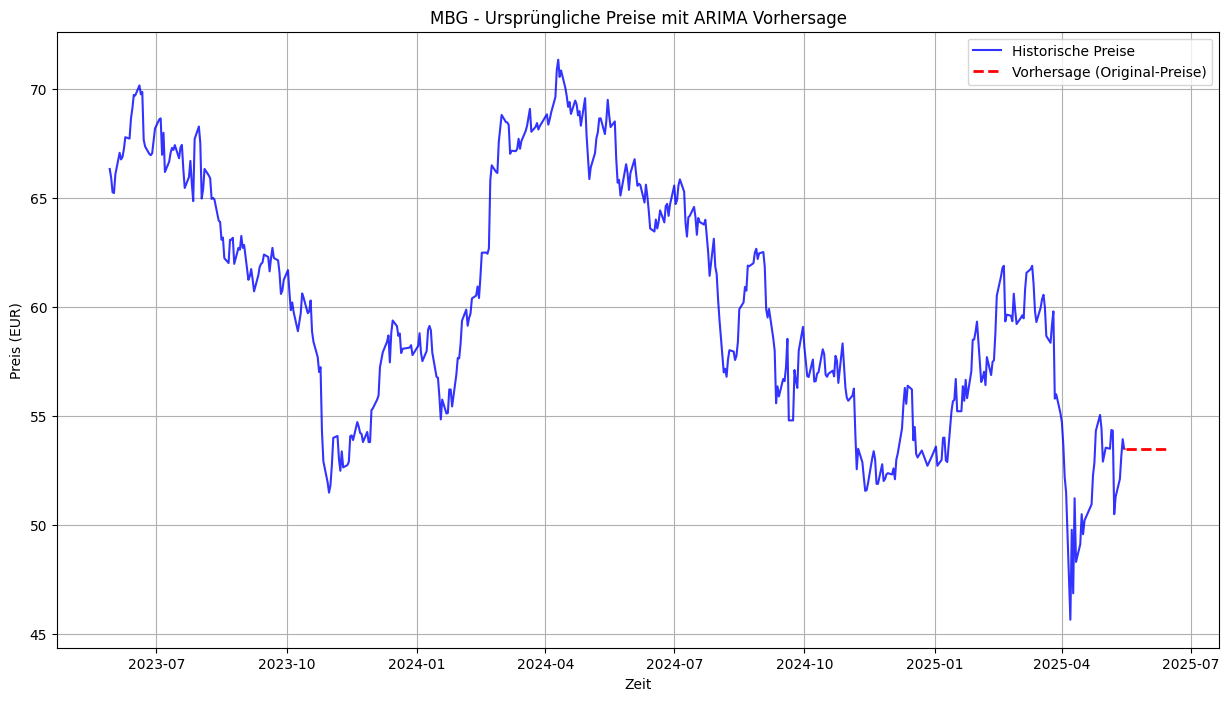

Letzter historischer Preis: 53.50 EUR
Erste Vorhersage: 53.50 EUR
Letzte Vorhersage: 53.50 EUR
Veränderung (erste Vorhersage): 0.00%


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_original_forecast(mbg_original, mbg_log_diff, forecast, forecast_periods=30):
    """
    Wandelt log_diff Vorhersage zurück in ursprüngliche Preise um und plottet sie.
    
    Parameter:
    -----------
    mbg_original : pandas.Series
        Die ursprünglichen Preis-Daten
    mbg_log_diff : pandas.Series
        Die log-differenzierten Daten
    forecast : numpy.array
        Die ARIMA Vorhersage der log_diff Werte
    forecast_periods : int
        Anzahl der vorhergesagten Perioden
    """
    
    # 1. Letzter log-Wert der historischen Daten
    mbg_log = np.log(mbg_original)
    last_log_value = mbg_log.iloc[-1]
    
    # 2. Wandle log_diff Vorhersage zu log-Werten um (kumulative Summe)
    forecast_log = []
    current_log = last_log_value
    
    for diff_value in forecast:
        current_log += diff_value
        forecast_log.append(current_log)
    
    # 3. Wandle log-Werte zu ursprünglichen Preisen um
    forecast_original = np.exp(forecast_log)
    
    # 4. Erstelle Plot
    plt.figure(figsize=(15, 8))
    
    # Plotte historische Daten (letzten 500 Punkte für bessere Übersicht)
    plot_start = max(0, len(mbg_original) - 500)
    plt.plot(mbg_original.iloc[plot_start:], 
             label='Historische Preise', color='blue', alpha=0.8)
    
    # Erstelle Index für Vorhersage
    if hasattr(mbg_original.index, 'freq') and mbg_original.index.freq:
        freq = mbg_original.index.freq
    else:
        # Schätze Frequenz basierend auf den letzten beiden Datenpunkten
        freq = mbg_original.index[-1] - mbg_original.index[-2]
    
    forecast_index = pd.date_range(
        start=mbg_original.index[-1] + freq,
        periods=forecast_periods,
        freq=freq
    )
    
    # Plotte Vorhersage
    plt.plot(forecast_index, forecast_original,
             label='Vorhersage (Original-Preise)', 
             linestyle='--', color='red', linewidth=2)
    
    # Verbindungslinie zwischen letztem historischen Punkt und erster Vorhersage
    plt.plot([mbg_original.index[-1], forecast_index[0]], 
             [mbg_original.iloc[-1], forecast_original[0]], 
             color='red', linestyle='--', alpha=0.5)
    
    plt.title(f'MBG - Ursprüngliche Preise mit ARIMA Vorhersage')
    plt.xlabel('Zeit')
    plt.ylabel('Preis (EUR)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 5. Zusätzliche Informationen
    print(f"Letzter historischer Preis: {mbg_original.iloc[-1]:.2f} EUR")
    print(f"Erste Vorhersage: {forecast_original[0]:.2f} EUR")
    print(f"Letzte Vorhersage: {forecast_original[-1]:.2f} EUR")
    print(f"Veränderung (erste Vorhersage): {((forecast_original[0] - mbg_original.iloc[-1]) / mbg_original.iloc[-1] * 100):.2f}%")
    
    return forecast_original, forecast_index

# Verwendung der Funktion
forecast_original_prices, forecast_dates = plot_original_forecast(
    mbg_original, 
    mbg_log_diff, 
    forecast, 
    forecast_periods
)

---

## 5. Modelldiagnose
### Ljung-Box Test (Portmanteau Test)
- Testet, ob Residuen autokorreliert sind
- Teststatistik: $Q = n(n+2)\sum_{k=1}^h \frac{\hat{\rho}_k^2}{n-k}$
- Nullhypothese: Residuen sind unkorreliert (white noise)
- Interpretation: p-Wert > 0.05 bedeutet, dass Residuen nicht autokorreliert sind

### Jarque-Bera Test
- Testet auf Normalverteilung der Residuen
- Teststatistik: $JB = \frac{n}{6}\left(S^2 + \frac{(K-3)^2}{4}\right)$
  wobei S die Schiefe und K die Kurtosis ist
- Nullhypothese: Residuen sind normalverteilt
- Interpretation: p-Wert > 0.05 bedeutet, dass Residuen normalverteilt sind

### Residuenanalyse
- Visuelle Inspektion: Zeitreihenplot, Histogramm, Q-Q-Plot
- Prüfen auf konstante Varianz (Homoskedastizität)

RESIDUENANALYSE
Ljung-Box Test p-Wert: 0.1236
✓ Keine Autokorrelation
Jarque-Bera Test p-Wert: 0.0000
✗ Keine Normalverteilung
Residuen Mittelwert: 0.000217
Residuen Std: 0.0217


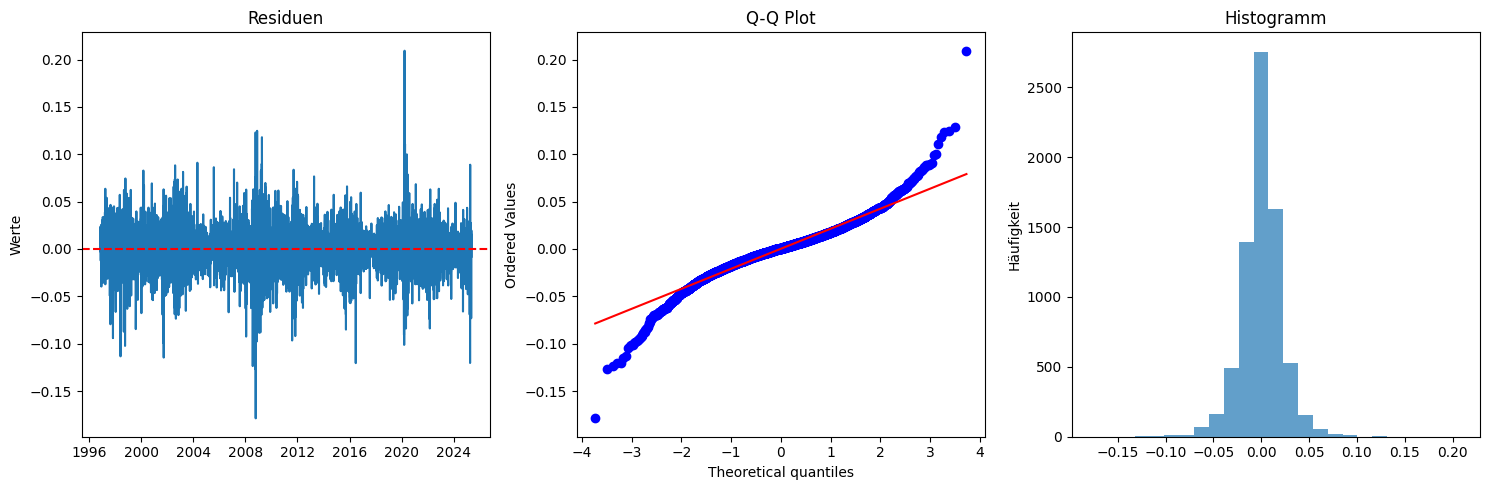

In [21]:
########################################################
#-----------------------   5.   -----------------------#
#------------------- Modelldiagnose -------------------#
########################################################

# EINFACHE RESIDUENANALYSE - GARANTIERT FUNKTIONIEREND

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera

# Residuen extrahieren
residuals = mbg_arima_model.resid()

print("RESIDUENANALYSE")
print("="*40)

# 1. LJUNG-BOX TEST
ljung_box_test = acorr_ljungbox(residuals, lags=10)
ljung_box_pvalue = ljung_box_test.iloc[-1]['lb_pvalue']

print(f"Ljung-Box Test p-Wert: {ljung_box_pvalue:.4f}")
if ljung_box_pvalue > 0.05:
    print("✓ Keine Autokorrelation")
else:
    print("✗ Autokorrelation vorhanden")

# 2. JARQUE-BERA TEST  
jb_test = jarque_bera(residuals)
jb_pvalue = jb_test[1]

print(f"Jarque-Bera Test p-Wert: {jb_pvalue:.4f}")
if jb_pvalue > 0.05:
    print("✓ Normalverteilung")
else:
    print("✗ Keine Normalverteilung")

# 3. BASIS-STATISTIKEN
print(f"Residuen Mittelwert: {residuals.mean():.6f}")
print(f"Residuen Std: {residuals.std():.4f}")

# 4. PLOTS
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Residuen über Zeit
ax1.plot(residuals)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_title('Residuen')
ax1.set_ylabel('Werte')

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot')

# Histogramm
ax3.hist(residuals, bins=25, alpha=0.7)
ax3.set_title('Histogramm')
ax3.set_ylabel('Häufigkeit')

plt.tight_layout()
plt.show()